## **Análisis de la Calidad del Vino** ⛅

Descripción de las variables a usar:
Input variables (based on physicochemical tests):
1. fixed acidity
2. volatile acidity
3. citric acid
4. residual sugar
5. chlorides
6. free sulfur dioxide
7. total sulfur dioxide
8. density
9. pH
10. sulphates
11. alcohol
   Output variable (based on sensory data):
12. quality (score between 0 and 10)

Enlace:
https://archive.ics.uci.edu/dataset/186/wine+quality


### **Paso 1: Importación de Datos** 🍷

In [1]:
### Importar los datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

vino = pd.read_csv('/content/winequality-white (2).csv', sep=';')
vino.head()


FileNotFoundError: [Errno 2] No such file or directory: '/content/winequality-white (2).csv'

### **Paso 2: Revisión de datos NAN** 🍷

In [ ]:
##Revisar si existe inconsistencia en los datos
vino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4897 non-null   float64
 2   citric acid           4897 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4897 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4897 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4897 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4897 non-null   float64
dtypes: float64(12)
memory usage: 459.3 KB


In [ ]:
##vino['alcohol']= vino['alcohol'].astype(float)
vino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4897 non-null   float64
 2   citric acid           4897 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4897 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4897 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4897 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4897 non-null   float64
dtypes: float64(12)
memory usage: 459.3 KB


In [ ]:
vino.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4897.000000,4897.000000,4898.000000,4897.000000,4898.000000,4897.000000,4898.000000,4898.000000,4897.000000,4898.000000,4897.000000
mean,6.854788,0.278253,0.334231,6.391415,0.045773,35.308085,138.366040,1.548363,3.188267,0.489873,12.261200,5.877884
std,0.843868,0.100801,0.121000,5.072058,0.021850,17.007137,42.500734,6.838541,0.151001,0.114122,34.165501,0.885727
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,103.898000,3.820000,1.080000,973.333333,9.000000


### **Paso 3: Limpieza de datos NAN** 🍷

In [ ]:
##Limpiar con media o mediana los datos NAN
##Función para detectar datos inconsistentes NAN
def datos_NAN(df):
    if isinstance(df, pd.DataFrame):
        total_na = df.isna().sum().sum()
        print("Dimensiones: %d filas, %d columnas" % (df.shape[0], df.shape[1]))
        print("Total valores NAN: %d" % (total_na))
        print("%50s %10s  %10s %10s" % ("Nombre Columna", "Tipo Columna", "#Unicos", "Cant Valores NAN"))
        col_name = df.columns
        dtyp = df.dtypes
        uniq = df.nunique()
        na_val = df.isna().sum()
        for i in range(len(df.columns)):
            print("%50s %10s  %10s %10s" % (col_name[i], dtyp[i], uniq[i], na_val[i]))
    else:
        print("Se esperaba un dataframe: %15s" % (type(df)))

datos_NAN(vino)

Dimensiones: 4898 filas, 12 columnas
Total valores NAN: 6
                                    Nombre Columna Tipo Columna     #Unicos Cant Valores NAN
                                     fixed acidity    float64          68          0
                                  volatile acidity    float64         125          1
                                       citric acid    float64          87          1
                                    residual sugar    float64         310          0
                                         chlorides    float64         160          1
                               free sulfur dioxide    float64         132          0
                              total sulfur dioxide    float64         251          1
                                           density    float64         890          0
                                                pH    float64         103          0
                                         sulphates    float64          79          1

<ipython-input-27-08a28ff7c0c3>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("%50s %10s  %10s %10s" % (col_name[i], dtyp[i], uniq[i], na_val[i]))


<Axes: >

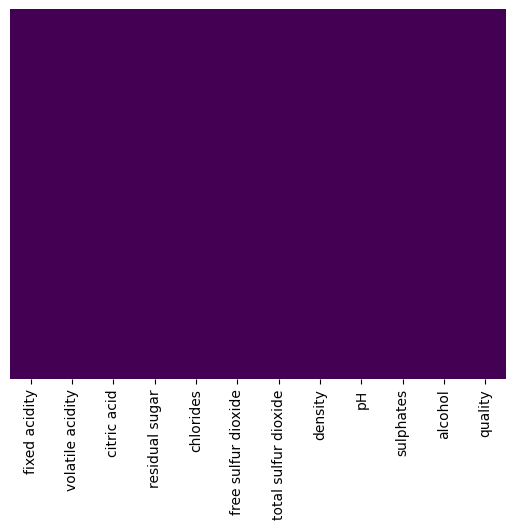

In [ ]:
sns.heatmap(vino.isnull(), yticklabels=False, cbar=False, cmap='viridis')

### **Paso 4: Realizar 5 gráficas exploratorias** 🍷

In [ ]:
variables = vino.columns
variables

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

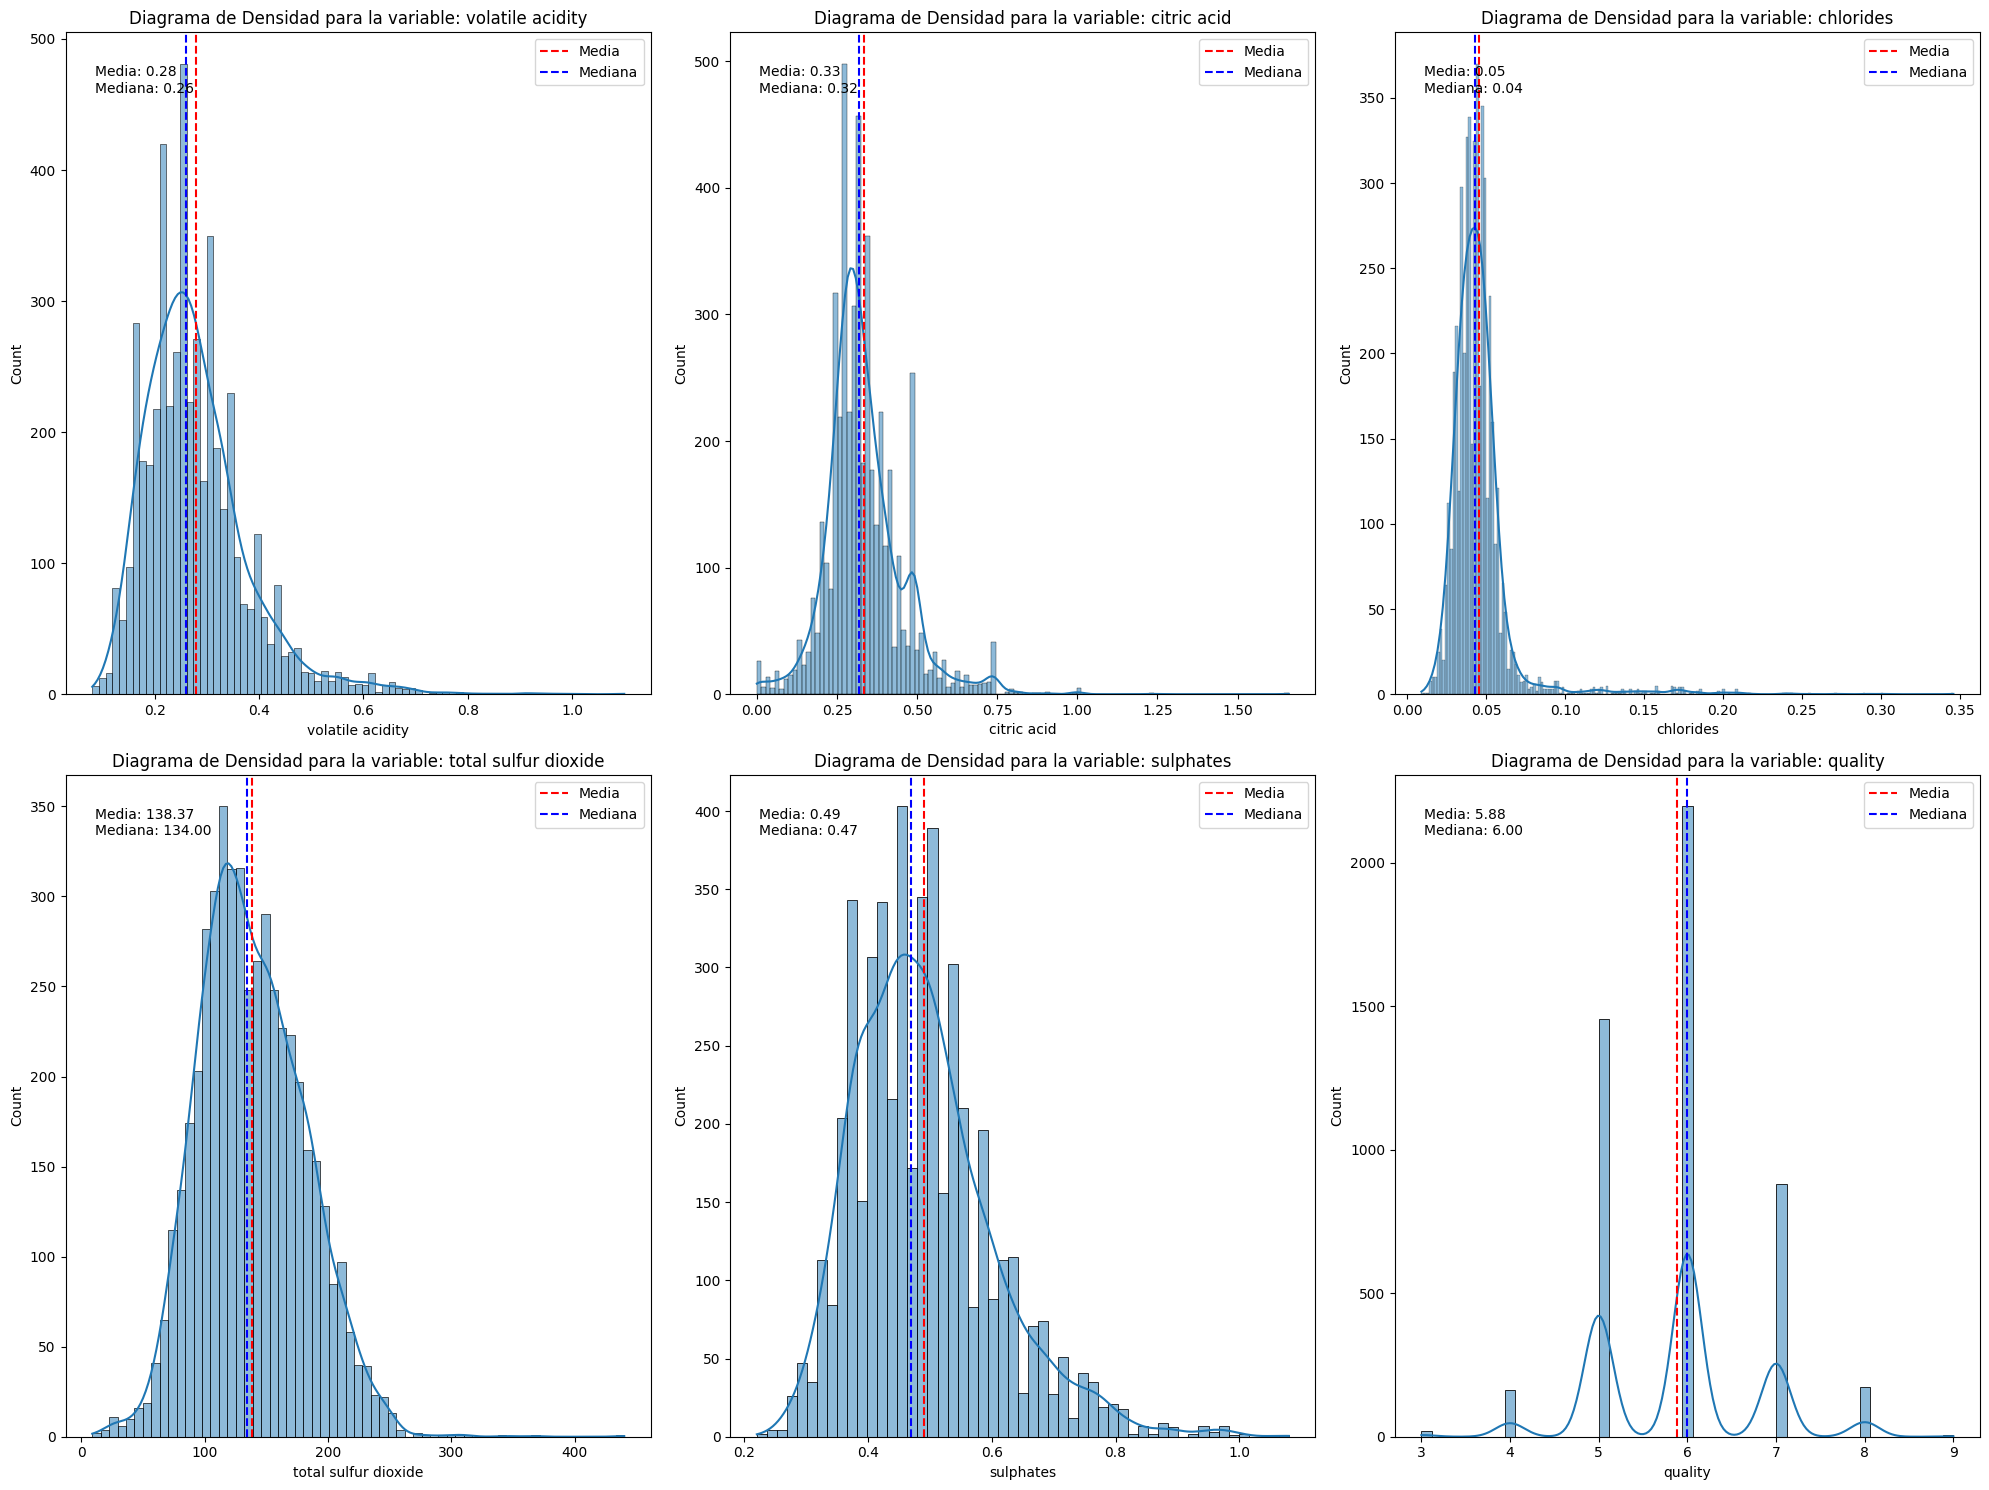

In [ ]:
##realizar gráficas de apoyo para definir pregunta de investigación - Generar observaciones

variables = [ 'volatile acidity', 'citric acid',
       'chlorides', 'total sulfur dioxide', 'sulphates', 'quality']

fig, axes = plt.subplots(2,3, figsize=(20,15))

axes = axes.flatten()

for i, var in enumerate(variables):
  ax = axes[i]
  sns.histplot(vino[var], kde=True, ax=ax)
  ax.axvline(vino[var].mean(), color='red', linestyle='--', label='Media')
  ax.axvline(vino[var].median(), color='blue', linestyle='--', label='Mediana')

  ax.annotate(f'Media: {vino[var].mean():.2f}\nMediana: {vino[var].median():.2f}',
              xy=(0.05, 0.95), xycoords='axes fraction', ha='left', va='top')

  ax.set_title(f'Diagrama de Densidad para la variable: {var}')
  ax.set_xlabel(var)
  ax.legend()

plt.tight_layout()
plt.show()

In [ ]:
vino['quality'].describe().T

,quality
count,4898.000000
mean,5.877909
std,0.885639
min,3.000000
25%,5.000000
50%,6.000000
75%,6.000000
max,9.000000


Text(0, 0.5, 'Acidez Fija')

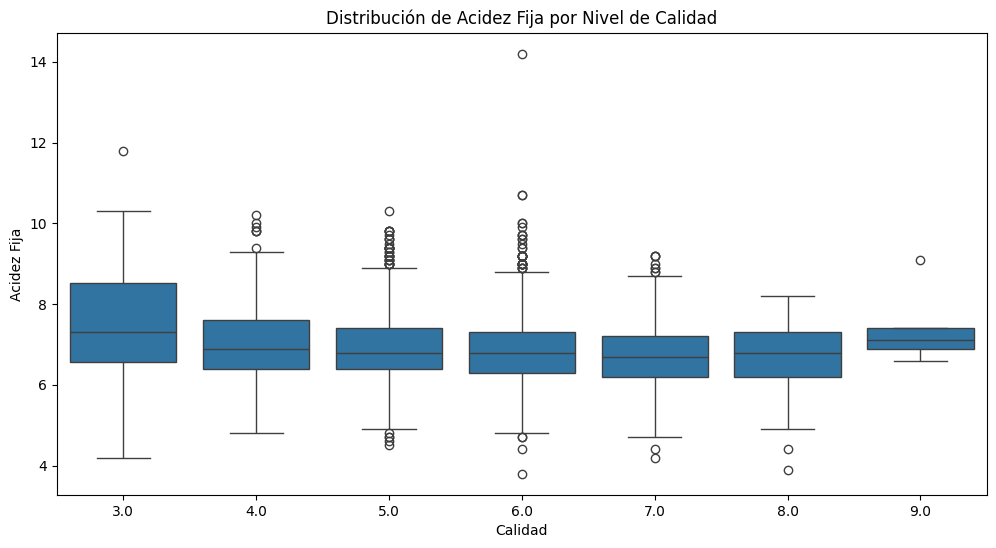

In [ ]:
##realizar 5 graficas con las variables de vino usando seaborn
plt.figure(figsize=(12, 6))
sns.boxplot(data=vino, x='quality', y='fixed acidity')
plt.title('Distribución de Acidez Fija por Nivel de Calidad')
plt.xlabel('Calidad')
plt.ylabel('Acidez Fija')

Text(0, 0.5, 'Azucar Residual')

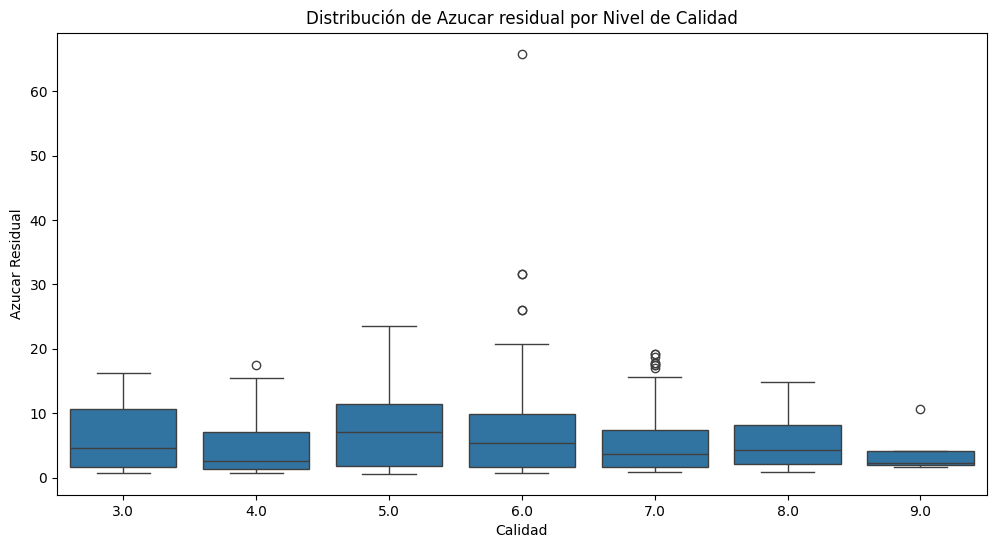

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=vino, x='quality', y='residual sugar')
plt.title('Distribución de Azucar residual por Nivel de Calidad')
plt.xlabel('Calidad')
plt.ylabel('Azucar Residual')

Text(0, 0.5, 'Frecuencia')

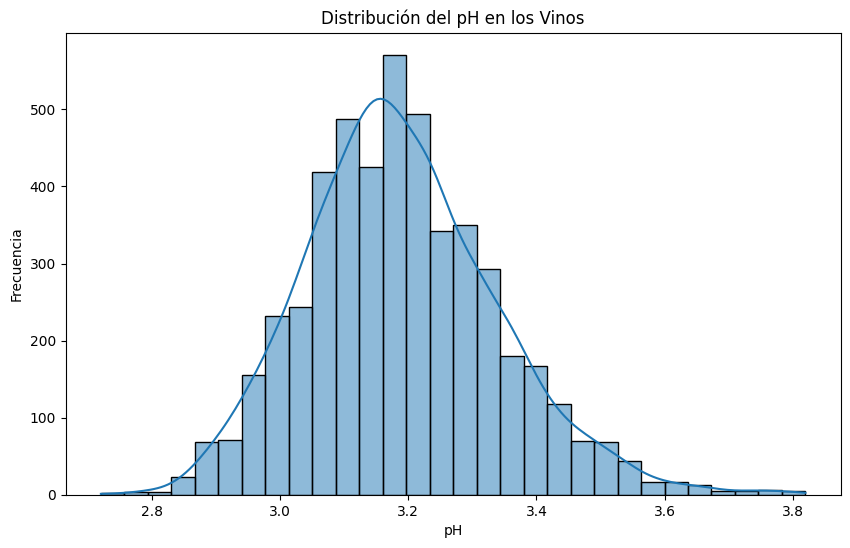

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=vino, x='pH', bins=30, kde=True)
plt.title('Distribución del pH en los Vinos')
plt.xlabel('pH')
plt.ylabel('Frecuencia')


### **4.1. Revisión Ruido**

In [ ]:
###Limpiar datos NAN
variables = [ 'volatile acidity', 'citric acid',
       'chlorides', 'total sulfur dioxide', 'sulphates', 'quality']

vino['volatile acidity']= vino['volatile acidity'].fillna(vino['volatile acidity'].median())
vino['quality']= vino['quality'].fillna(vino['quality'].median())
vino['citric acid']= vino['citric acid'].fillna(vino['citric acid'].median())
vino['chlorides']= vino['chlorides'].fillna(vino['chlorides'].median())
vino['total sulfur dioxide']= vino['total sulfur dioxide'].fillna(vino['total sulfur dioxide'].median())
vino['sulphates']= vino['sulphates'].fillna(vino['sulphates'].median())


In [ ]:
for k,v in vino.items():
  q1 = v.quantile(0.25)
  q3 = v.quantile(0.75)
  iqr = q3-q1
  v_col = v[(v <= q1 - 1.5 *iqr) |(v >= q3 + 1.5 * iqr)]
  porc = np.shape(v_col)[0]  / np.shape(vino)[0]
  print('columna %s ruido= %s' % (k, porc))

columna fixed acidity ruido= 0.029808084932625562
columna volatile acidity ruido= 0.0379746835443038
columna citric acid ruido= 0.05512454062882809
columna residual sugar ruido= 0.0014291547570436914
columna chlorides ruido= 0.04246631278072683
columna free sulfur dioxide ruido= 0.010208248264597795
columna total sulfur dioxide ruido= 0.0038791343405471623
columna density ruido= 0.014495712535728868
columna pH ruido= 0.015312372396896692
columna sulphates ruido= 0.02531645569620253
columna alcohol ruido= 0.006941608819926501
columna quality ruido= 0.04083299305839118


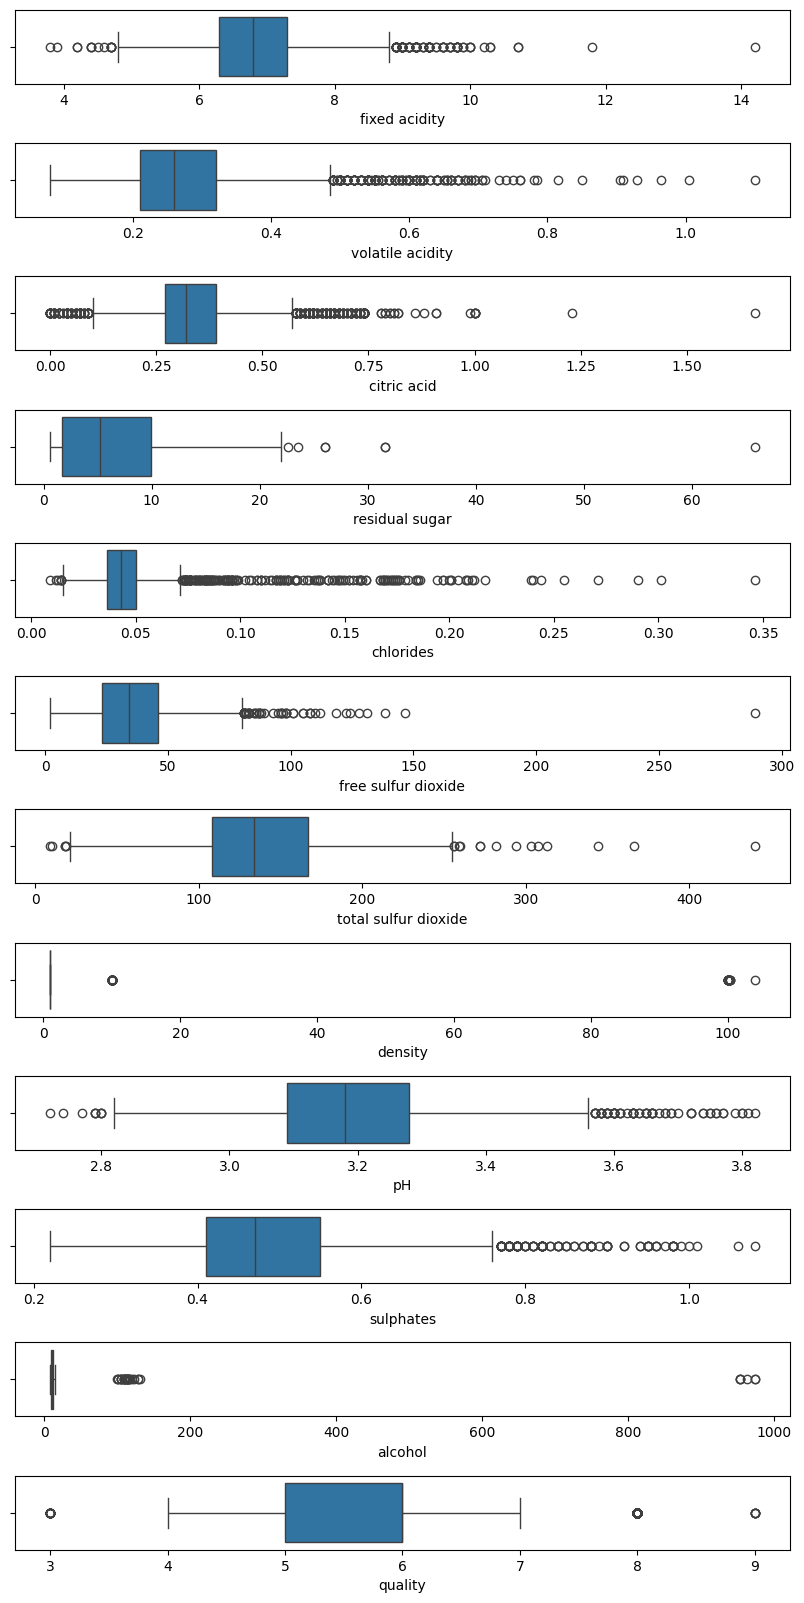

In [ ]:
##revisión previa
columnas = vino.columns

fig, ax = plt.subplots(12,1, figsize=(10,20))
fig.subplots_adjust(hspace=0.80)
for i in range(12):
  sns.boxplot(x=columnas[i], data=vino , ax=ax[i])

In [ ]:
# Reemplazo de outliers por la mediana
df_vino = vino.copy()

# Definimos el umbral de outliers como aquellos valores fuera de 1.5 desviaciones estándar
for col in df_vino .columns:
    mean = df_vino [col].mean()
    std = df_vino [col].std()
    outliers = (df_vino [col] < mean - 1.5 * std) | (df_vino [col] > mean + 1.5 * std)
    df_vino.loc[outliers, col] = df_vino[col].median()

In [ ]:
for k,v in df_vino.items():
  q1 = v.quantile(0.25)
  q3 = v.quantile(0.75)
  iqr = q3-q1
  v_col = v[(v <= q1 - 1.5 *iqr) |(v >= q3 + 1.5 * iqr)]
  porc = np.shape(v_col)[0]  / np.shape(df_vino)[0]
  print('columna %s ruido= %s' % (k, porc))

columna fixed acidity ruido= 0.0
columna volatile acidity ruido= 0.0
columna citric acid ruido= 0.012249897917517355
columna residual sugar ruido= 0.0
columna chlorides ruido= 0.014699877501020826
columna free sulfur dioxide ruido= 0.0
columna total sulfur dioxide ruido= 0.0
columna density ruido= 0.009799918334013884
columna pH ruido= 0.0
columna sulphates ruido= 0.0
columna alcohol ruido= 0.0
columna quality ruido= 0.0


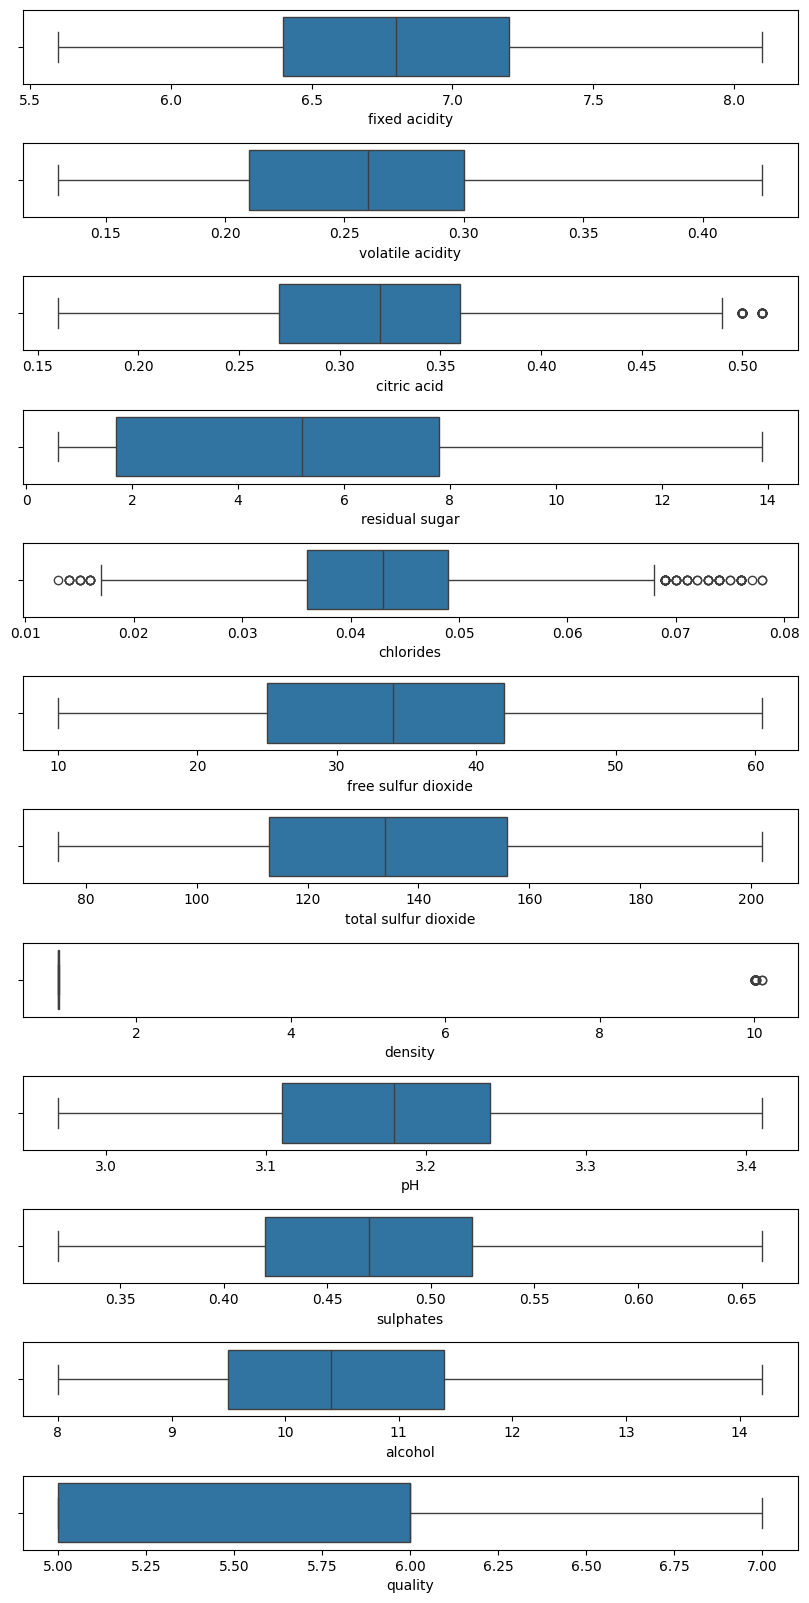

In [ ]:
##revisión previa
columnas = df_vino.columns

fig, ax = plt.subplots(12,1, figsize=(10,20))
fig.subplots_adjust(hspace=0.80)
for i in range(12):
  sns.boxplot(x=columnas[i], data=df_vino , ax=ax[i])

In [ ]:
vino.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,4898.0,6.854788,0.843868,3.80000,6.300000,6.80000,7.3000,14.200000
volatile acidity,4898.0,0.278249,0.100791,0.08000,0.210000,0.26000,0.3200,1.100000
citric acid,4898.0,0.334228,0.120988,0.00000,0.270000,0.32000,0.3900,1.660000
residual sugar,4898.0,6.391415,5.072058,0.60000,1.700000,5.20000,9.9000,65.800000
chlorides,4898.0,0.045772,0.021848,0.00900,0.036000,0.04300,0.0500,0.346000
free sulfur dioxide,4898.0,35.308085,17.007137,2.00000,23.000000,34.00000,46.0000,289.000000
total sulfur dioxide,4898.0,138.365149,42.496440,9.00000,108.000000,134.00000,167.0000,440.000000
density,4898.0,1.548363,6.838541,0.98711,0.991723,0.99374,0.9961,103.898000
pH,4898.0,3.188267,0.151001,2.72000,3.090000,3.18000,3.2800,3.820000
sulphates,4898.0,0.489869,0.114111,0.22000,0.410000,0.47000,0.5500,1.080000


In [ ]:
df_vino.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,4898.0,6.785923,0.572518,5.60000,6.400000,6.80000,7.20000,8.100
volatile acidity,4898.0,0.260656,0.064825,0.13000,0.210000,0.26000,0.30000,0.425
citric acid,4898.0,0.323906,0.075614,0.16000,0.270000,0.32000,0.36000,0.510
residual sugar,4898.0,5.264914,3.685938,0.60000,1.700000,5.20000,7.80000,13.900
chlorides,4898.0,0.042559,0.010059,0.01300,0.036000,0.04300,0.04900,0.078
free sulfur dioxide,4898.0,33.611168,12.006284,10.00000,25.000000,34.00000,42.00000,60.500
total sulfur dioxide,4898.0,135.307677,30.289788,75.00000,113.000000,134.00000,156.00000,202.000
density,4898.0,1.082265,0.888160,0.98711,0.991723,0.99374,0.99604,10.103
pH,4898.0,3.179728,0.100499,2.97000,3.110000,3.18000,3.24000,3.410
sulphates,4898.0,0.472180,0.077211,0.32000,0.420000,0.47000,0.52000,0.660


### **Paso 5: Normalizar los datos** 🍷

In [ ]:
df_vino.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,4898.0,6.785923,0.572518,5.60000,6.400000,6.80000,7.20000,8.100
volatile acidity,4898.0,0.260656,0.064825,0.13000,0.210000,0.26000,0.30000,0.425
citric acid,4898.0,0.323906,0.075614,0.16000,0.270000,0.32000,0.36000,0.510
residual sugar,4898.0,5.264914,3.685938,0.60000,1.700000,5.20000,7.80000,13.900
chlorides,4898.0,0.042559,0.010059,0.01300,0.036000,0.04300,0.04900,0.078
free sulfur dioxide,4898.0,33.611168,12.006284,10.00000,25.000000,34.00000,42.00000,60.500
total sulfur dioxide,4898.0,135.307677,30.289788,75.00000,113.000000,134.00000,156.00000,202.000
density,4898.0,1.082265,0.888160,0.98711,0.991723,0.99374,0.99604,10.103
pH,4898.0,3.179728,0.100499,2.97000,3.110000,3.18000,3.24000,3.410
sulphates,4898.0,0.472180,0.077211,0.32000,0.420000,0.47000,0.52000,0.660


In [ ]:
from sklearn.preprocessing import MinMaxScaler
def normaData(df):
    valores = df.values
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaler = scaler.fit(valores)

    pd.DataFrame(np.vstack((scaler.data_min_, scaler.data_max_)),
             index=['Min', 'Max'],
             columns=df.columns)

    normalizados = scaler.transform(valores)
    df_norm = pd.DataFrame(normalizados,
                       index=df.index,
                       columns=df.columns)
    return df_norm

df_vinonorm = normaData(df_vino)

df_vinonorm.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,4898.0,0.474369,0.229007,0.0,0.320000,0.480000,0.640000,1.0
volatile acidity,4898.0,0.442903,0.219747,0.0,0.271186,0.440678,0.576271,1.0
citric acid,4898.0,0.468302,0.216039,0.0,0.314286,0.457143,0.571429,1.0
residual sugar,4898.0,0.350745,0.277138,0.0,0.082707,0.345865,0.541353,1.0
chlorides,4898.0,0.454751,0.154761,0.0,0.353846,0.461538,0.553846,1.0
free sulfur dioxide,4898.0,0.467548,0.237748,0.0,0.297030,0.475248,0.633663,1.0
total sulfur dioxide,4898.0,0.474864,0.238502,0.0,0.299213,0.464567,0.637795,1.0
density,4898.0,0.010438,0.097430,0.0,0.000506,0.000727,0.000980,1.0
pH,4898.0,0.476656,0.228406,0.0,0.318182,0.477273,0.613636,1.0
sulphates,4898.0,0.447590,0.227090,0.0,0.294118,0.441176,0.588235,1.0


In [ ]:
df_vinonormini = normaData(vino)

### **Paso 6: Test de Normalidad** 🍷

In [ ]:
##Aplicar el test de normalidad shapiro - wilk - Generar Observaciones
from scipy import stats
def testShapiroWilk(df):
        valoresP = []
        concepto = []
        variable = []
        for column in df:
            k2, p_value = stats.shapiro(df[column].values)
            valoresP.append(p_value)
            variable.append(column)
            if (p_value < 0.05):
                concepto.append('No es una variable Normal')
            else:
                concepto.append('Es una variable Normal')
        dfShapiro = pd.DataFrame(
            {'Variable': variable, 'Valores P': valoresP, 'Concepto': concepto})
        return dfShapiro

testShapiroWilk(df_vinonorm)

,Variable,Valores P,Concepto
0,fixed acidity,2.925795e-23,No es una variable Normal
1,volatile acidity,3.923448e-24,No es una variable Normal
2,citric acid,2.417443e-32,No es una variable Normal
3,residual sugar,1.239627e-47,No es una variable Normal
4,chlorides,1.206360e-11,No es una variable Normal
5,free sulfur dioxide,1.091492e-24,No es una variable Normal
6,total sulfur dioxide,7.564561e-26,No es una variable Normal
7,density,1.550707e-93,No es una variable Normal
8,pH,2.632017e-24,No es una variable Normal
9,sulphates,1.101578e-24,No es una variable Normal


In [ ]:
testShapiroWilk(df_vinonormini)

,Variable,Valores P,Concepto
0,fixed acidity,1.150152e-27,No es una variable Normal
1,volatile acidity,4.607349e-48,No es una variable Normal
2,citric acid,9.548285e-45,No es una variable Normal
3,residual sugar,2.820712e-51,No es una variable Normal
4,chlorides,2.139437e-75,No es una variable Normal
5,free sulfur dioxide,3.857850e-40,No es una variable Normal
6,total sulfur dioxide,4.562011e-19,No es una variable Normal
7,density,5.016601e-94,No es una variable Normal
8,pH,6.505519e-20,No es una variable Normal
9,sulphates,1.826780e-37,No es una variable Normal


### **Paso 7: Correlación** 🍷

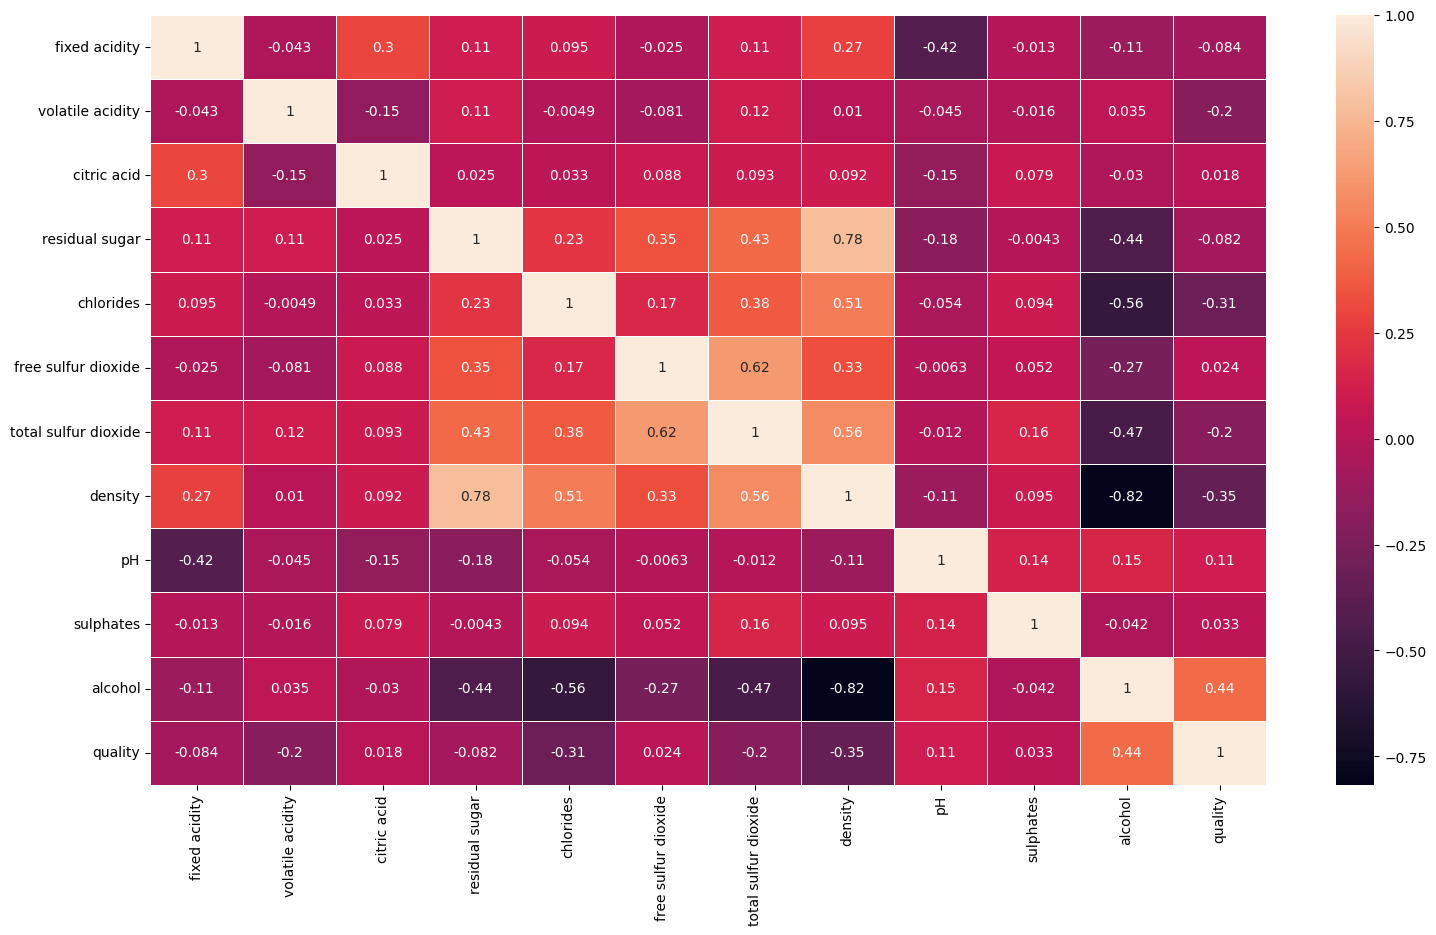

In [ ]:
###Realizar las correlaciones necesarias y analizarlas - correlación de vino sin limpieza de ruido
def DiagCorr(df, tamuno, tamdos):
    f, ax = plt.subplots(figsize=(tamuno,tamdos))
    sns.heatmap(df.corr(method="spearman"), annot=True, linewidths=.5, ax=ax)

DiagCorr(df_vinonormini, 18,10)

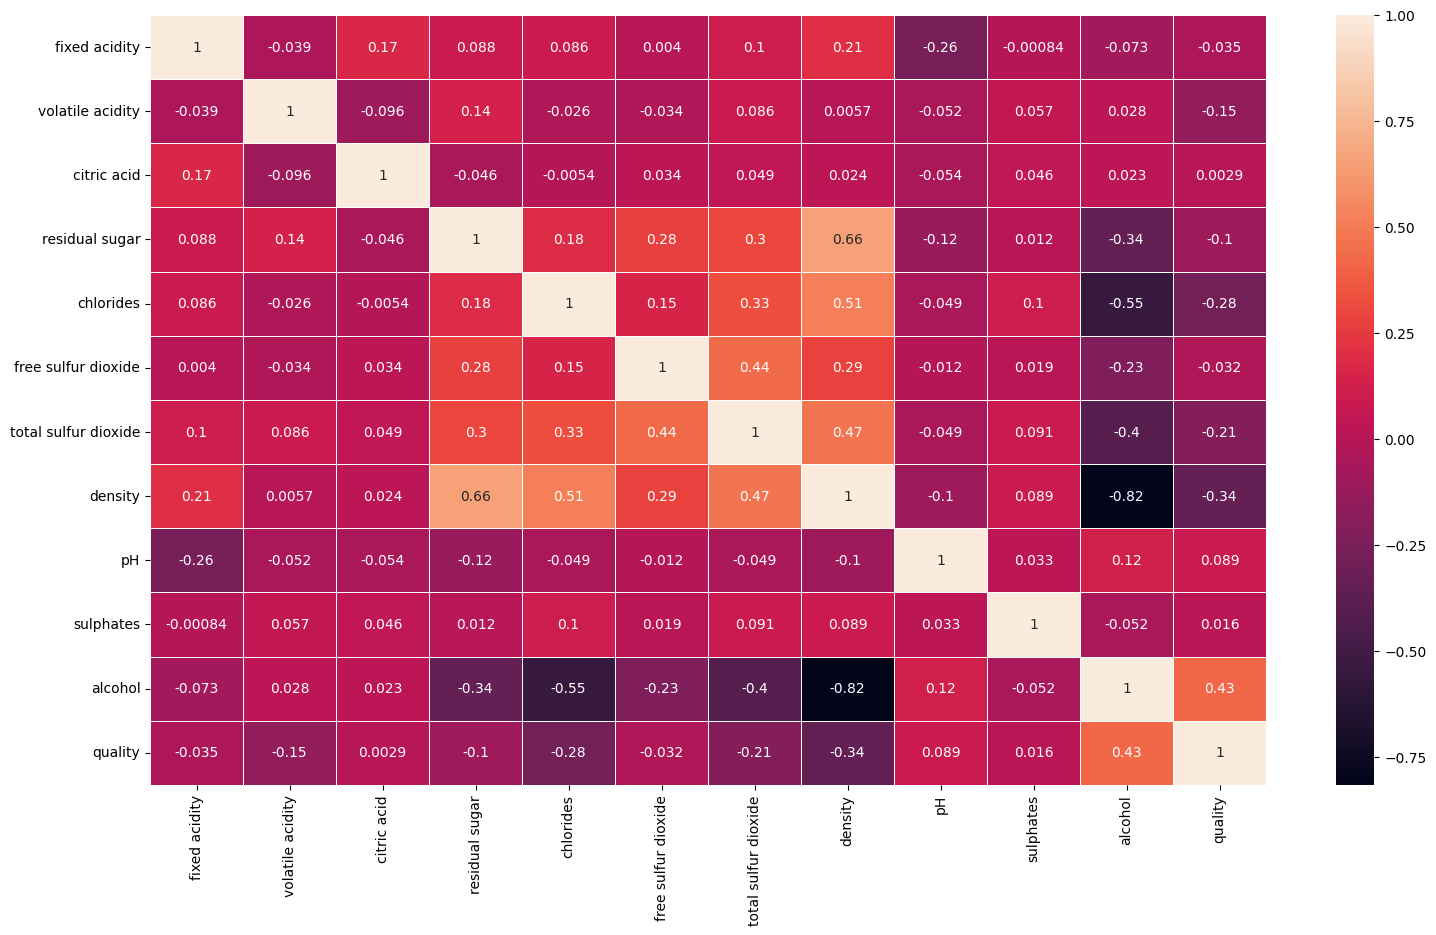

In [ ]:
DiagCorr(df_vinonorm, 18,10)

### **Paso 8: Estudiar la Heteroscedasticidad** 🍷

In [ ]:
##Aplicar el test de breuch pagan para verificar la heteroscedasticidad - solucionar en caso de presentar

### **Paso 9: Estudiar la Multicolinealidad** 🍷

In [ ]:
##Aplicar el test de VIF para revisar la existencia de multicolinealidad - solucionar en caso de presentar

### **Paso 10: Definir pregunta de Investigación para Regresión** 🍷

In [ ]:
###establecer una pregunta de investigación puntual para regresión
#¿Cuál es la reacion entre la densidad y el azucar residual dentro de los vinos?


### **Paso 11: Primer Modelo Regresión Múltiple 60% entrenamiento y 40% testeo** 🍷

In [ ]:
##Crear el primer modelo y gráficarlo generar conclusiones.

### **Paso 12: Segundo Modelo Regresión Múltiple 70% entrenamiento y 30% testeo** 🍷

In [ ]:
##Crear el segundo modelo y gráficarlo generar conclusiones.

### **Paso 13: Tercer Modelo Regresión Múltiple 80% entrenamiento y 20% testeo** 🍷

In [ ]:
##Crear el tercer modelo y gráficarlo generar conclusiones.

### **Paso 14: Conocer las mejores características para el modelo seleccionado** 🍷

In [ ]:
##Seleccionar el mejor modelo y mostrar sus mejores características y sacar conclusiones

### **Paso 15: Responder la pregunta de investigación y Concluir el ejercicio** 🍷

In [ ]:
##responder la pregunta de investigación teniendo en cuenta los 14 puntos anteriores